<a href="https://colab.research.google.com/github/thdwldud/dacon/blob/main/titanic_high.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 데이터를 활용한 데이터 분석

## 1. 라이브러리 및 데이터
### Library & Data

In [134]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [135]:
# 데이터 불러오기
train = pd.read_csv('train.csv') # 모델 학습 파일
test = pd.read_csv('test.csv') # 모델 시험지 파일
submission = pd.read_csv('submission.csv') # 답안지 파일

## 2. 탐색적 자료분석
### Exploratory Data Analysis(EDA)

#### pd.데이터프레임.head()
- 데이터 프레임의 위에서부터 n개 행을 보여주는 함수
- n의 기본값(default)은 5

In [136]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerID : 탑승객 고유 아이디
- Survived : 탑승객 생존 유무 (0: 사망, 1: 생존)
- Pclass : 등실의 등급
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
- Parch : 함께 탐승한 부모, 자식의 수
- Ticket :티켓 번호
- Fare : 티켓의 요금
- Cabin : 객실번호
-Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)

In [139]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [140]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


- submission에 female이면 1, male이면 0 값 저장되어 있음

#### pd.데이터프레임.tail()
- 데이터 프레임의 아래에서부터 n개 행을 보여주는 함수
- n의 기본값(default)은 5

In [141]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### pd.데이터프레임.shape
- 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [142]:
print(train.shape)
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


#### pd.데이터프레임.info()
- 데이터 셋의 column별 정보를 알려주는 함수
- 비어있지 않은 값(non-null)은 몇 개인지?
- column의 type은 무엇인지?
  * type의 종류 : int(정수), float(실수), object(문자열), 등등(date,...)

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### pd.데이터프레임.describe()
- 숫자형(int, float) column들의 기술통계량을 보여주는 함수
- 기술통계량이란?
  * 해당 column을 대표할 수 있는 통계값들을 의미
- 기술 통계량의 종류
  * count: 해당 column에서 비어 있지 않은 값의 개수
  * mean: 평균
  * std: 표준편차
  * min: 최솟값 (이상치 포함)
  * 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
  * 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
  * 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
  * max: 최댓값 (이상치 포함)
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
  * 아래쪽 울타리: Q1​ - 1.5 * IQR
  * 위쪽 울타리: Q3​ + 1.5 * IQR
  * IQR = Q3 - Q1

In [145]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- train 데이터의 생존율이 평균적으로 38%

In [146]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### pd.Series.value_counts()
- series: 데이터프레임의 하나의 열
- series 내 고유값들 각각의 개수를 보여주는 함수
- 가장 많이 나오는 고유값들 순서로 부여줌
- 비어 있는 값은 고려하지 않음

In [147]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### pd.Series.unique()
- 해당 series의 고유값들만 보여주는 함수
- {1, 1, 1, 3}이라는 시리즈가 있다면, unique() 함수 적용 시 {1,3}이 출력
- nan 값이 있을 시 nan 값도 포함하여 출력한다
- 출현하는 순서대로 나오기 때문에, 알파벳 순서 또는 오름차순으로 정렬되어 있지 않음

In [148]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

#### pd.데이터프레임.groupby()
- 집단에 대한 통계량 확인

In [149]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


- female 경우 생존율이 74%
- male 경우 생존율이 18%
- 성별에 따라 생존율이 크게 차이남

In [150]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


- 좌석등급에 따라 생존율이 크게 차이남

#### pd.Series.plot(kind = "bar")
- 막대그래프
- index 값이 x축, value 값이 y축으로 대응됨
- value_counts()의 결과물을 보여줄 때 유용
- groupby된 결과물을 보여줄 때 유용

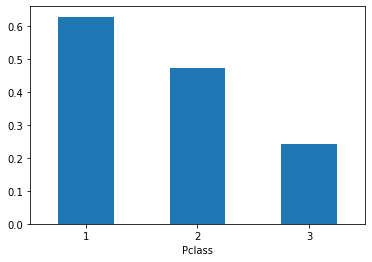

In [151]:
train.groupby('Pclass').mean()['Survived'].plot(kind="bar", rot = 0) # rot = 0 or rot = 45 하면 숫자가 똑바로 나옴

3    491
1    216
2    184
Name: Pclass, dtype: int64


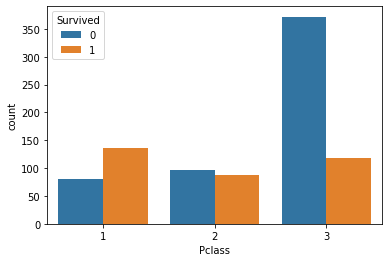

In [152]:
print(train['Pclass'].value_counts())
ax = sns.countplot(x='Pclass', hue = 'Survived', data = train)

- Survived 피처를 기준으로 그룹을 나누어 그룹별 Pclass 피처의 분포

#### pd.Series.plot(kind = "hist")
- 히스토그램 : 구간별로 속해있는 row의 개수를 시각화
- 수치형에서만 가능, 범주형은 안됨

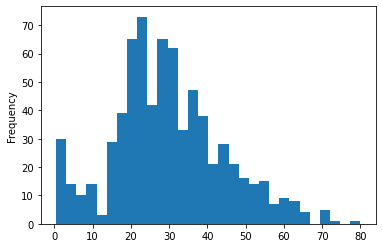

In [153]:
train['Age'].plot(kind = "hist", bins = 30) # bins = 30 : 구간이 조금 더 촘촘해짐

- 보조선은 grid = True를 통해 추가할 수 있음

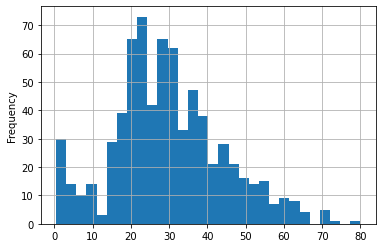

In [154]:
train['Age'].plot(kind = "hist", bins = 30, grid = True)

#### pd.데이터프레임.plot(x, y, kind = "scatter")
- 산점도 : 두 변수간의 관계를 시각화

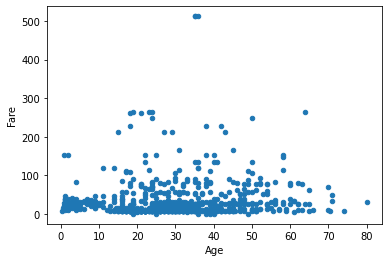

In [155]:
train.plot(x = "Age", y = "Fare", kind = "scatter")

In [156]:
from scipy import stats

def valid_features(df, col_name, distribution_check = True):
  g = sns.FacetGrid(df, col = 'Survived')
  g.map(plt.hist, col_name, bins = 30)

  titanic_survived = df[df['Survived'] == 1]
  titanic_survived_static = np.array(titanic_survived[col_name])
  print("data std is", '%.2f' %np.std(titanic_survived_static))
  titanic_n_survived = df[df['Survived'] == 0]
  titanic_n_survived_static = np.array(titanic_n_survived[col_name])
  print("data std is", '%.2f' %np.std(titanic_n_survived_static))


  tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
  tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var = False)
  print("The t-statistic and p-value assuming equal variance is %.3f and %3f." %tTestResult)
  print("The t-statistic and p-value not assuming equal variance is %.3f and %3f." %tTestResultDiffVar)

  if distribution_check:
    print("The w-statistic and p-vlaue in Survived %.3f and %.3f" %stats.shapiro(titanic_survived[col_name]))
    print("The w-statistic and p-vlaue in Non-Survived %.3f and %.3f" %stats.shapiro(titanic_n_survived[col_name]))

data std is 14.93
data std is 14.16
The t-statistic and p-value assuming equal variance is -2.067 and 0.039125.
The t-statistic and p-value not assuming equal variance is -2.046 and 0.041190.
The w-statistic and p-vlaue in Survived 0.983 and 0.001
The w-statistic and p-vlaue in Non-Survived 0.969 and 0.000


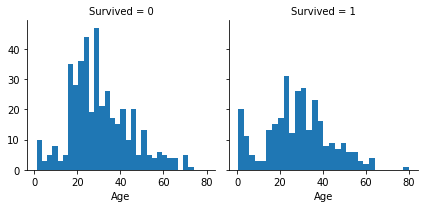

In [157]:
valid_features(train[train['Age']>0], 'Age', distribution_check = True)

data std is 0.71
data std is 1.29
The t-statistic and p-value assuming equal variance is -1.054 and 0.292244.
The t-statistic and p-value not assuming equal variance is -1.194 and 0.232663.


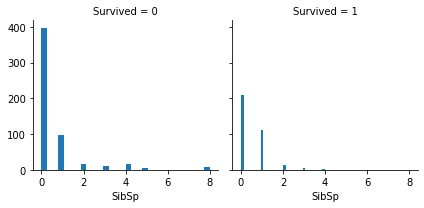

In [158]:
valid_features(train, 'SibSp', distribution_check = False)

## 3. 데이터 전처리
### Data Cleansing & Pre-Processing

#### pd.시리즈.isna()
- 결측치 여부를 확인해줌
- 결측치면 True, 아니면 False

In [159]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [160]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### pd.데이터프레임.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 함
- 범주형 변수일 경우, 최빈값으로 대체할 수 있음

In [161]:
# 나이의 결측값을 나이의 중앙값으로 대체
train['Age'].median()

28.0

In [162]:
train['Age'] = train['Age'].fillna(28)

In [163]:
test['Age'] = test['Age'].fillna(28)

In [164]:
# 'Embarked'의 결측값을 최빈값으로 대체
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [165]:
train['Embarked'] = train['Embarked'].fillna('S')

In [166]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### pd.시리즈.map()
- 시리즈 내 값을 변환할 때 사용하는 함수

In [167]:
# 성별을 남성이면 0, 여성이면 1로 변환
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

In [168]:
whole_df = train.append(test)
train_idx_num = len(train)

In [169]:
print(whole_df['Cabin'].value_counts()[:10])

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F2                 4
B96 B98            4
C78                4
F4                 4
D                  4
Name: Cabin, dtype: int64


In [170]:
whole_df['Cabin'] = whole_df['Cabin'].fillna('X')

whole_df['Cabin'] = whole_df['Cabin'].apply(lambda x : x[0])

whole_df['Cabin'] = whole_df['Cabin'].replace({"G":"X", "T":"X"})

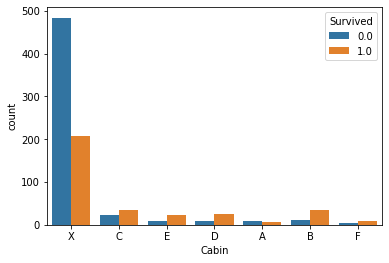

In [171]:
ax = sns.countplot(x='Cabin', hue = 'Survived', data = whole_df)
plt.show()

In [172]:
name_grade = whole_df['Name'].apply(lambda x: x.split(", ",1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona']


In [173]:
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'],
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'],
              'C' : ['Jonkheer', 'the Countess'],
              'D': ['Mr', 'Don'],
              'E': ['Master'],
              'F': ['Miss', 'Mlle', 'Lady']}

def give_grade(x):
  grade = x.split(", ", 1)[1].split(".")[0]
  for key, value in grade_dict.items():
    for title in value:
      if grade == title:
        return key
  return 'G'

whole_df['Name'] = whole_df['Name'].apply(lambda x: give_grade(x))
print(whole_df['Name'].value_counts())

D    758
F    263
B    201
E     61
A     24
C      2
Name: Name, dtype: int64


In [174]:
train = whole_df[:train_idx_num]
test = whole_df[train_idx_num:]

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


In [176]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     0 non-null      float64
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 42.5+ KB


In [177]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,D,0,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1.0,1,B,1,38.0,1,0,PC 17599,71.2833,C,C
2,3,1.0,3,F,1,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1.0,1,B,1,35.0,1,0,113803,53.1000,C,S
4,5,0.0,3,D,0,35.0,0,0,373450,8.0500,X,S


In [178]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,NaN,3,D,male,34.5,0,0,330911,7.8292,X,Q
1,893,NaN,3,B,female,47.0,1,0,363272,7.0000,X,S
2,894,NaN,2,D,male,62.0,0,0,240276,9.6875,X,Q
3,895,NaN,3,D,male,27.0,0,0,315154,8.6625,X,S
4,896,NaN,3,B,female,22.0,1,1,3101298,12.2875,X,S


In [179]:
train.loc[train.Embarked == 'C', 'Embarked']=0
train.loc[train.Embarked == 'Q', 'Embarked']=1
train.loc[train.Embarked == 'S', 'Embarked']=2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [180]:
test.loc[test.Embarked == 'C', 'Embarked']=0
test.loc[test.Embarked == 'Q', 'Embarked']=1
test.loc[test.Embarked == 'S', 'Embarked']=2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [181]:
train['Embarked'] = train['Embarked'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [182]:
test['Embarked'] = test['Embarked'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [183]:
train.loc[train.Cabin == 'X', 'Cabin']=0
train.loc[train.Cabin == 'C', 'Cabin']=1
train.loc[train.Cabin == 'E', 'Cabin']=2
train.loc[train.Cabin == 'D', 'Cabin']=3
train.loc[train.Cabin == 'A', 'Cabin']=4
train.loc[train.Cabin == 'B', 'Cabin']=5
train.loc[train.Cabin == 'F', 'Cabin']=6

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [184]:
test.loc[test.Cabin == 'X', 'Cabin']=0
test.loc[test.Cabin == 'C', 'Cabin']=1
test.loc[test.Cabin == 'E', 'Cabin']=2
test.loc[test.Cabin == 'D', 'Cabin']=3
test.loc[test.Cabin == 'A', 'Cabin']=4
test.loc[test.Cabin == 'B', 'Cabin']=5
test.loc[test.Cabin == 'F', 'Cabin']=6

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [185]:
train['Cabin'] = train['Cabin'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
test['Cabin'] = test['Cabin'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
train.loc[train.Name == 'A', 'Name']=0
train.loc[train.Name == 'B', 'Name']=1
train.loc[train.Name == 'C', 'Name']=2
train.loc[train.Name == 'D', 'Name']=3
train.loc[train.Name == 'E', 'Name']=4
train.loc[train.Name == 'F', 'Name']=5
train.loc[train.Name == 'G', 'Name']=6

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [188]:
test.loc[test.Name == 'A', 'Name']=0
test.loc[test.Name == 'B', 'Name']=1
test.loc[test.Name == 'C', 'Name']=2
test.loc[test.Name == 'D', 'Name']=3
test.loc[test.Name == 'E', 'Name']=4
test.loc[test.Name == 'F', 'Name']=5
test.loc[test.Name == 'G', 'Name']=6

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [189]:
train['Name'] = train['Name'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
test['Name'] = test['Name'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [191]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,3,0,22.0,1,0,A/5 21171,7.2500,0,2
1,2,1.0,1,1,1,38.0,1,0,PC 17599,71.2833,1,0
2,3,1.0,3,5,1,26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1.0,1,1,1,35.0,1,0,113803,53.1000,1,2
4,5,0.0,3,3,0,35.0,0,0,373450,8.0500,0,2


In [196]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,NaN,3,3,0,34.5,0,0,330911,7.8292,0,1
1,893,NaN,3,1,1,47.0,1,0,363272,7.0000,0,2
2,894,NaN,2,3,0,62.0,0,0,240276,9.6875,0,1
3,895,NaN,3,3,0,27.0,0,0,315154,8.6625,0,2
4,896,NaN,3,1,1,22.0,1,1,3101298,12.2875,0,2


In [193]:
test.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
dtype: int64

## 4. 변수 선택 및 모델 구축
### Feature Engineering & Initial Modeling

X -> MODEL -> y(Survived)

- 성별('Sex'), 좌석등급('Pclass'), 이름('Name'), 나이('Age'), 함께 탐승한 형제자매, 아내, 남편의 수('SibSp'),객실번호('Cabin'), 항구이름('Embarked')

In [194]:
X_train = train[['Sex', 'Pclass', 'Name', 'Age', 'SibSp', 'Cabin', 'Embarked']]
y_train = train['Survived']

In [195]:
# 모델은 숫자 형태의 데이터만 받을 수 있음
# 성별은 아직 수치화 되지 않음
# 성별을 남성이면 0, 여성이면 1로 변환
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [197]:
X_test = test[['Sex', 'Pclass', 'Name', 'Age', 'SibSp', 'Cabin', 'Embarked']]

#### sklearn.linear_model_LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

In [198]:
lr = LogisticRegression()

#### sklearn.tree.DecisionTreeClassifier()
- 의사결정 나무 모델

In [199]:
dt = DecisionTreeClassifier()

## 5. 모델 학습 및 검증
### Model Tuning & Evaluation

#### model.fit()
- 모델 학습

In [200]:
lr.fit(X_train, y_train)

LogisticRegression()

In [201]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### model.predict()
- 모델 예측

In [202]:
lr.predict(X_test)

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

#### model.predict_proba()
- 모델 예측
- 확률값으로 예측
- 타이타닉 대회의 결과가 생존율이므로 단순하게 0,1 값보다는 그 사이 실수값으로 나오는게 좋음

In [203]:
lr.predict_proba(X_test)

array([[0.90672055, 0.09327945],
       [0.61916339, 0.38083661],
       [0.92633479, 0.07366521],
       [0.89761649, 0.10238351],
       [0.35805532, 0.64194468],
       [0.83406488, 0.16593512],
       [0.407512  , 0.592488  ],
       [0.82323331, 0.17676669],
       [0.17946936, 0.82053064],
       [0.92912193, 0.07087807],
       [0.9014828 , 0.0985172 ],
       [0.75867464, 0.24132536],
       [0.03210853, 0.96789147],
       [0.95778035, 0.04221965],
       [0.14639242, 0.85360758],
       [0.13552019, 0.86447981],
       [0.79839716, 0.20160284],
       [0.81439255, 0.18560745],
       [0.51114749, 0.48885251],
       [0.409859  , 0.590141  ],
       [0.80606083, 0.19393917],
       [0.81822444, 0.18177556],
       [0.07619421, 0.92380579],
       [0.4109983 , 0.5890017 ],
       [0.05887617, 0.94112383],
       [0.97025085, 0.02974915],
       [0.02189619, 0.97810381],
       [0.82390003, 0.17609997],
       [0.52757256, 0.47242744],
       [0.91963315, 0.08036685],
       [0.

- 두개의 열은 사망확률, 생존확률

In [204]:
# 두개의 열 중 생존확률을 선택
lr_pred = lr.predict_proba(X_test)[:, 1] # 모든행의 1번째 컬럼

In [205]:
dt_pred = dt.predict_proba(X_test)[:, 1]

#### pd.데이터프레임.to_csv()
- csv파일 저장하는 함수

In [206]:
submission['Survived'] = lr_pred
submission

,PassengerId,Survived
0,892,0.093279
1,893,0.380837
2,894,0.073665
3,895,0.102384
4,896,0.641945
...,...,...
413,1305,0.098517
414,1306,0.934943
415,1307,0.065184
416,1308,0.098517


In [207]:
submission.to_csv('logistic_regression_pred.csv', index = False) # index 옵션 명시하지 않으면 index까지 포함됨

In [208]:
submission['Survived'] = dt_pred
submission

,PassengerId,Survived
0,892,0.00
1,893,0.00
2,894,1.00
3,895,0.75
4,896,0.00
...,...,...
413,1305,0.08
414,1306,1.00
415,1307,0.00
416,1308,0.08


In [209]:
submission.to_csv('decision_tree_pred.csv', index = False) # index 옵션 명시하지 않으면 index까지 포함됨